# P2C3: Classifiez avec la Régression Logistique


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/OpenClassrooms-Student-Center/8063076-Initiez-vous-au-Machine-Learning/blob/master/notebooks/P2C4_partitionnez_kmean.ipynb)



In [7]:
import numpy as np
np.random.seed(808)
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


## Créer un dataset partitionné

Pour créer un dataset artificiel en 2 dimensions constitué de K clusters de N échantillons chacun, scikit-learn offre la fonction make_blob().

Par exemple voici 3 "blobs" bien séparés constitués de 3000 échantillons  chacun n_samples=3000, centrés respectivement aux coordonnées centers = [[2, 2], [-2, -2], [2, -2]]  et d'écart type cluster_std=0.7 .




In [1]:

centers = [[2, 2], [-2, -2], [2, -2]]
X, labels_true = make_blobs(
                      n_samples=3000, 
                      centers=centers, 
                      cluster_std=0.7)


In [3]:
# dimension 3000 x 2
X.shape

(3000, 2)

In [4]:
labels_true

array([1, 2, 0, ..., 0, 1, 2])

In [5]:
# de dimension 3000
len(labels_true)

3000

## Visualisation

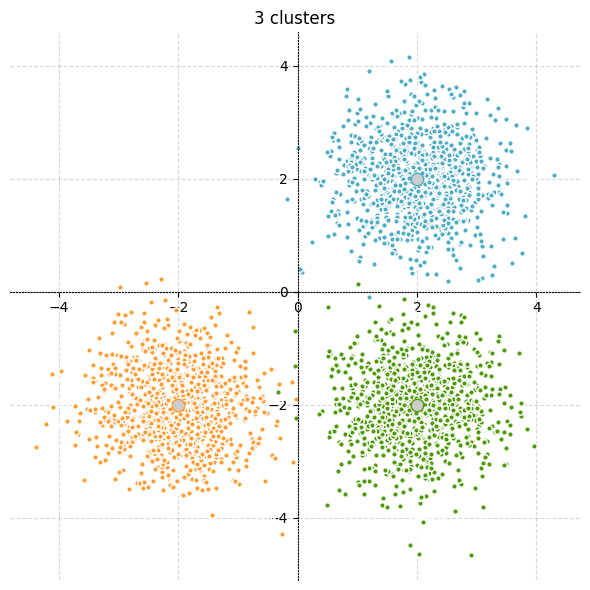

In [8]:
    centers = [[2, 2], [-2, -2], [2, -2]]
    X, labels_true = make_blobs(n_samples=3000, centers=centers, cluster_std=0.7)
    n_clusters = len(centers)
    fig = plt.figure(figsize=(6, 6))
    colors = ["#4EACC5", "#FF9C34", "#4E9A06"]

    # KMeans
    ax = fig.add_subplot(1, 1, 1)

    ax.set_title("3 clusters")

    for k, col in zip(range(len(centers)), colors):
        my_members = labels_true == k
        ax.plot(X[my_members, 0], X[my_members, 1], "w", markerfacecolor=col, marker="o", markersize=4, alpha = 1)
    for k, col in zip(range(len(centers)), colors):
        ax.plot(
            centers[k][0],
            centers[k][1],
            "o",
            markerfacecolor='#CCC',
            markeredgecolor=col,
            markersize=9,
        )
    # ax.set_title("Original")
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_linestyle('dotted')
    ax.spines['left'].set_linestyle('dotted')

    # Customize the appearance of grid lines (dotted and alpha=0.5)
    ax.xaxis.grid(True, linestyle='--', alpha=0.5)
    ax.yaxis.grid(True, linestyle='--', alpha=0.5)
    # Remove the top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.tight_layout()
    plt.show()


## Appliquons le k-means()

In [11]:

k_means = KMeans( n_clusters=3, random_state = 808, n_init = 'auto')
k_means.fit(X)
print(k_means.cluster_centers_)

[[-2.01674234 -2.00132226]
 [ 1.99684897  2.01163065]
 [ 1.97609209 -2.00958227]]


On obtient les centres suivant: [-2.02 -2.00], [ 1.99  2.01], [ 1.98 -2.01] soit très proches des centres initiaux de nos données: [2, 2], [-2, -2], [2, -2]

### Visualisation

[[ 1.98505358 -1.99725151]
 [ 1.90767708  2.01198477]
 [-1.99722742 -2.00625206]]
score -4691.895658453627
silhouette_score:  0.5911589557676065
silhouette_score:  0.5793930224211312


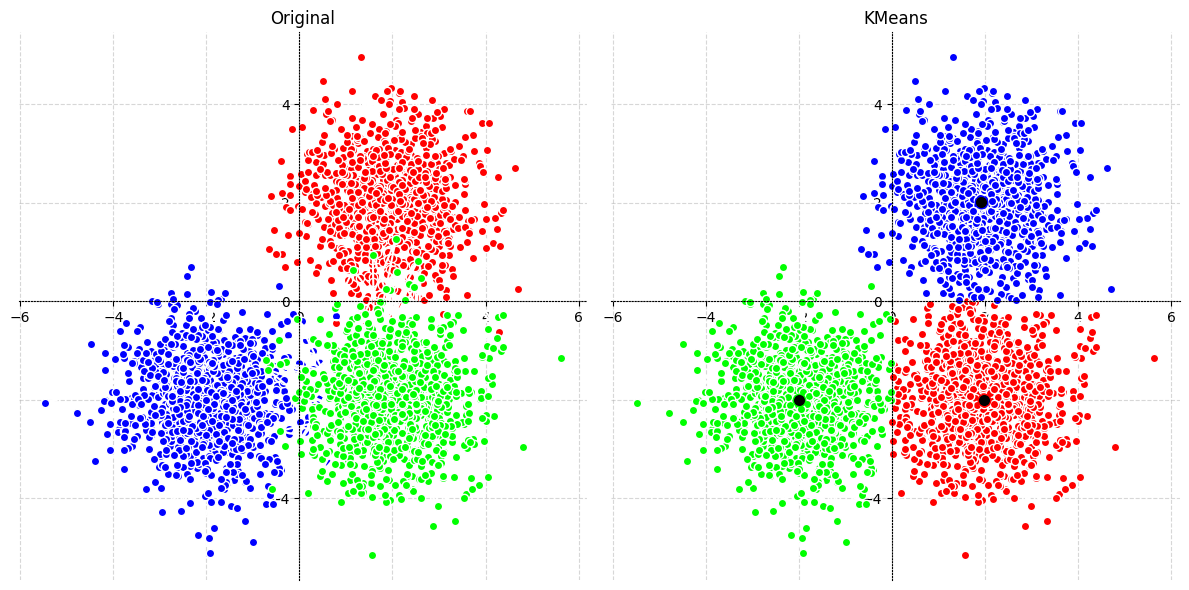

In [12]:
    centers = [[2, 2], [-2, -2], [2, -2]]
    X, labels_true = make_blobs(n_samples=3000, centers=centers, cluster_std=0.9)

    from sklearn.cluster import KMeans
    n_clusters=3
    k_means = KMeans(init="k-means++", n_clusters=n_clusters, random_state = 808 , n_init = 'auto'  )
    k_means.fit(X)
    print(k_means.cluster_centers_)
    print("score", k_means.score(X))

    from sklearn.metrics import silhouette_score
    k_means_labels = k_means.predict(X)
    print("silhouette_score: ", silhouette_score(X,k_means_labels ))
    print("silhouette_score: ", silhouette_score(X,labels_true ))


    fig = plt.figure(figsize=(12, 6))
    colors = ["#4EACC5", "#FF9C34", "#4E9A06","#111111"]
    colors = ["#FF0000", "#0000FF", "#00FF00","#111111"]

    # KMeans
    ax = fig.add_subplot(1, 2, 1)

    # for k, col in zip(range(n_clusters), colors):
    for k in range(n_clusters):
        ax.plot(X[labels_true == k, 0], X[labels_true == k, 1], "w", markerfacecolor=colors[k], marker="o", markersize=6, alpha = 1)

    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_linestyle('dotted')
    ax.spines['left'].set_linestyle('dotted')

    # Customize the appearance of grid lines (dotted and alpha=0.5)
    ax.xaxis.grid(True, linestyle='--', alpha=0.5)
    ax.yaxis.grid(True, linestyle='--', alpha=0.5)
    # Remove the top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title("Original")

    ax = fig.add_subplot(1, 2, 2)
    for k in range(n_clusters):
        cluster_center = k_means.cluster_centers_[k]
        ax.plot(X[k_means_labels == k, 0], X[k_means_labels == k, 1], "w", markerfacecolor=colors[k], marker="o", markersize=6, alpha = 1)
    for k in range(n_clusters):
        cluster_center = k_means.cluster_centers_[k]
        ax.plot(
            cluster_center[0],
            cluster_center[1],
            "o",
            markerfacecolor='#000',
            markeredgecolor=colors[k],
            markersize=9,
        )
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_linestyle('dotted')
    ax.spines['left'].set_linestyle('dotted')

    # Customize the appearance of grid lines (dotted and alpha=0.5)
    ax.xaxis.grid(True, linestyle='--', alpha=0.5)
    ax.yaxis.grid(True, linestyle='--', alpha=0.5)
    # Remove the top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title("KMeans")
    plt.tight_layout()
    plt.show()


# Coefficient de Silhouette

In [13]:
from sklearn.metrics import silhouette_score
k_means_labels = k_means.predict(X)
print("silhouette_score: ", silhouette_score(X,k_means_labels ))

silhouette_score:  0.5911589557676065


## Selection du nombre de clusters optimal avec le coefficient de Silhouette


n_clusters 2
score -12533.987587759393
silhouette_score:  0.45183183937689286

n_clusters 3
score -4673.548871890593
silhouette_score:  0.5907298716991993

n_clusters 4
score -4101.346396140983
silhouette_score:  0.4736437202424169

n_clusters 5
score -3618.9410837961004
silhouette_score:  0.37490521581548625

n_clusters 6
score -3197.695512750194
silhouette_score:  0.37631736505735186

n_clusters 7
score -2756.801524375836
silhouette_score:  0.3140296010915361


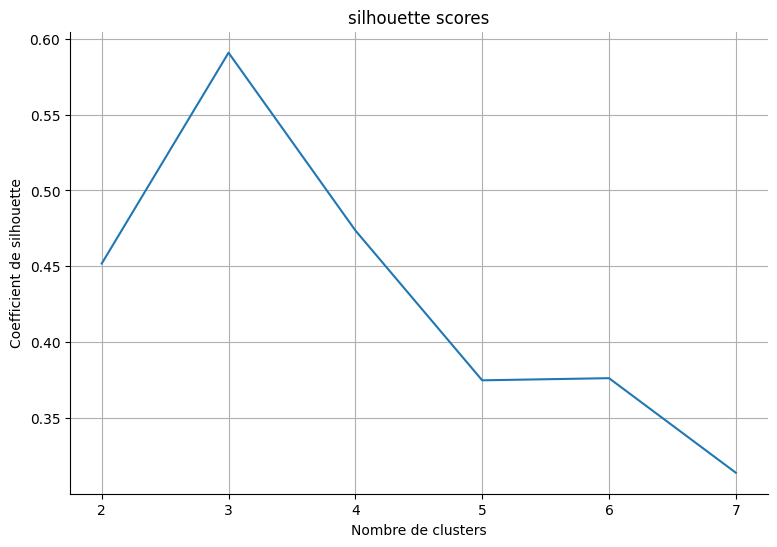

In [14]:
    centers = [[2, 2], [-2, -2], [2, -2]]
    X, labels_true = make_blobs(n_samples=3000, centers=centers, cluster_std=0.9)

    silhouette_scores = []
    for n_clusters in range(2,8):
        print()
        print("n_clusters",n_clusters)
        k_means = KMeans(init="k-means++", n_clusters=n_clusters, random_state = 808 , n_init = 'auto'  )
        k_means.fit(X)
        print("score", k_means.score(X))

        k_means_labels = k_means.predict(X)
        print("silhouette_score: ", silhouette_score(X,k_means_labels ))
        silhouette_scores.append(silhouette_score(X,k_means_labels ))

    fig = plt.figure(figsize=(9, 6))

    ax = fig.add_subplot(1, 1, 1)
    plt.plot(range(2,8), silhouette_scores)
    ax.set_title('silhouette scores')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel('Nombre de clusters')
    ax.set_ylabel('Coefficient de silhouette')
    plt.grid()
    plt.show()

On observe bien un pic de la valeur du coefficient pour 3 clusters.

# Appliquez le k-means sur Iris

In [15]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [19]:
model = KMeans(n_clusters=3, n_init="auto")
model.fit(X)

KMeans(n_clusters=3, n_init='auto')

In [18]:
# Voici les scores de classification
print("score", model.score(X))
print("silhouette_score: ", silhouette_score(X,model.labels_ ))


score -78.8556658259773
silhouette_score:  0.551191604619592


## performance du clustering en tant qu'outil de classification

In [66]:
labels = model.labels_.copy()
print("confusion_matrix\n",confusion_matrix(y,labels ))
print(set(labels))

confusion_matrix
 [[50  0  0]
 [ 0  3 47]
 [ 0 36 14]]
{0, 1, 2}


In [69]:
# Match categories de kmeans avec les bonnes  categories du dataset
labels = model.labels_.copy()
# temp values
labels[labels==0] = 5
labels[labels==1] = 10
labels[labels==2] = 15

# Bonnes catégories
labels[labels == 5] = 0
labels[labels == 10] = 2
labels[labels == 15] = 1

In [70]:

print("confusion_matrix\n",confusion_matrix(y,labels ))

confusion_matrix
 [[50  0  0]
 [ 0 47  3]
 [ 0 14 36]]


In [71]:
from sklearn.metrics import accuracy_score

print("accuracy_score",accuracy_score(y,labels ))


accuracy_score 0.8866666666666667


Donc une performance assez bonne avec une précision de 88,7%.

La matrice de confusion montre que la catégorie 1 est identifiée à 100% 

Les catégories 2 et 3 sont en majorité aussi bien identifiées.
